5947 nodes, 8476 edges.
900 nodes, 8476 edges.


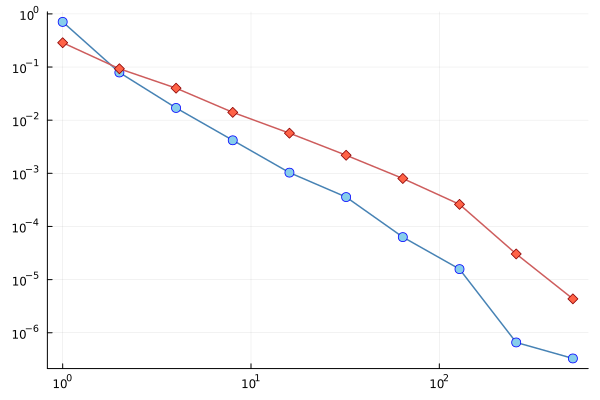

In [1]:
include("../utils.jl")
include("../pdgm_coag_icrp.jl")
include("../pdgm_coag_icrp_plots.jl")
using Serialization

In, coag_In, params_true = deserialize("synthetic.data")
println("$(length(In.nodes)) nodes, $(length(In.edge_lengths)) edges.")
println("$(length(coag_In.nodes)) nodes, $(length(coag_In.edge_lengths)) edges.")
plot_fof(In.degrees; colorset="blue")
plot_fof(coag_In.degrees; colorset="red", redraw=true)


In [5]:
num_chains = 3
chains = Vector{PDGMCoagICRPChain}(undef, 0)
preds = Vector{PDGMCoagICRPPred}(undef, 0)
for i in 1:num_chains
    chain, pred = deserialize("results/pdgm_coag_icrp/run$i.data")
    push!(chains, chain)
    push!(preds, pred)
end

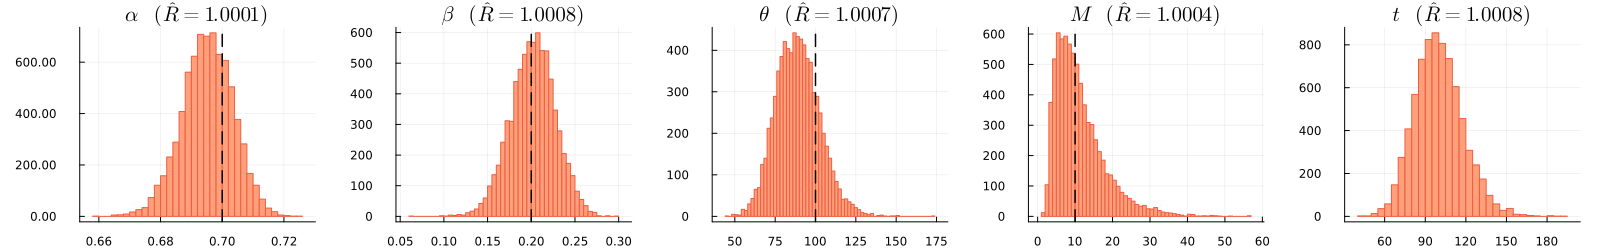

In [6]:
mkpath("figures/pdgm_coag_icrp")
p = plot_chain(chains; true_vals=params_true)


Number of nodes RMSE: 593.8288
Number of edges RMSE: 94.9163
Degree dist average KS: 0.0118+-0.0061
Coag number of nodes RMSE: 79.5466
Coag degree dist average KS: 0.0351+-0.0139


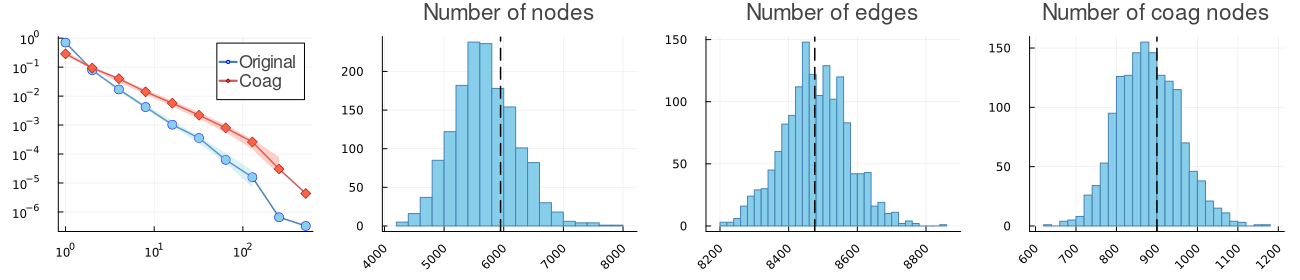

In [7]:
plot_predictions(In, coag_In, preds)